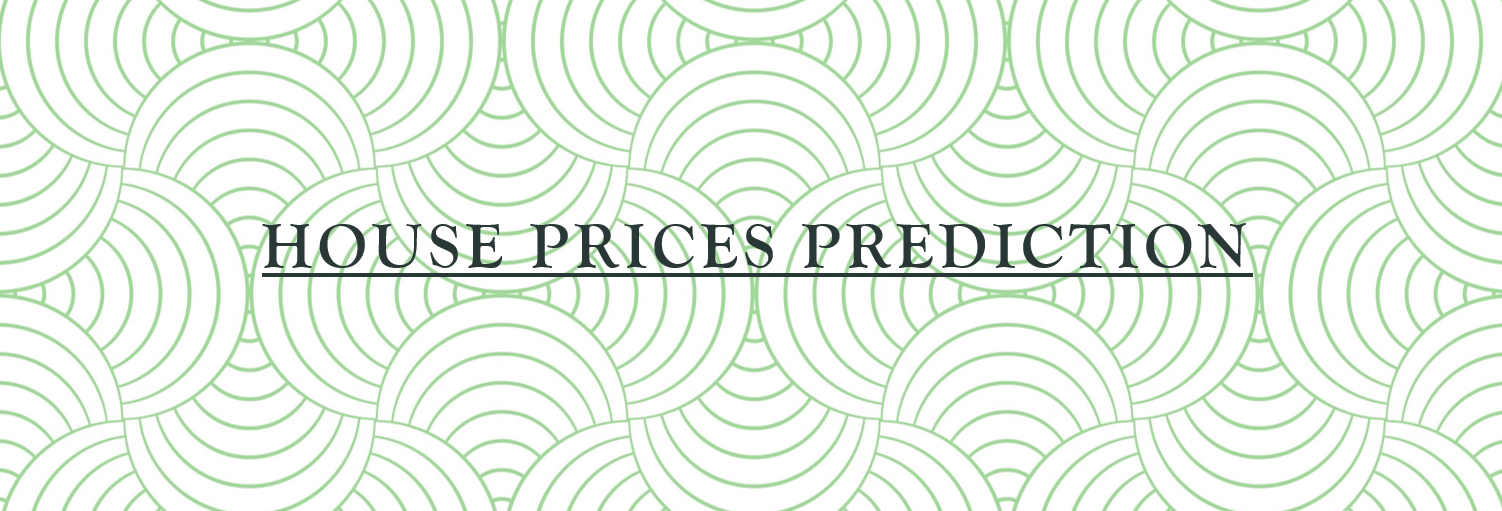

# Project Structure :

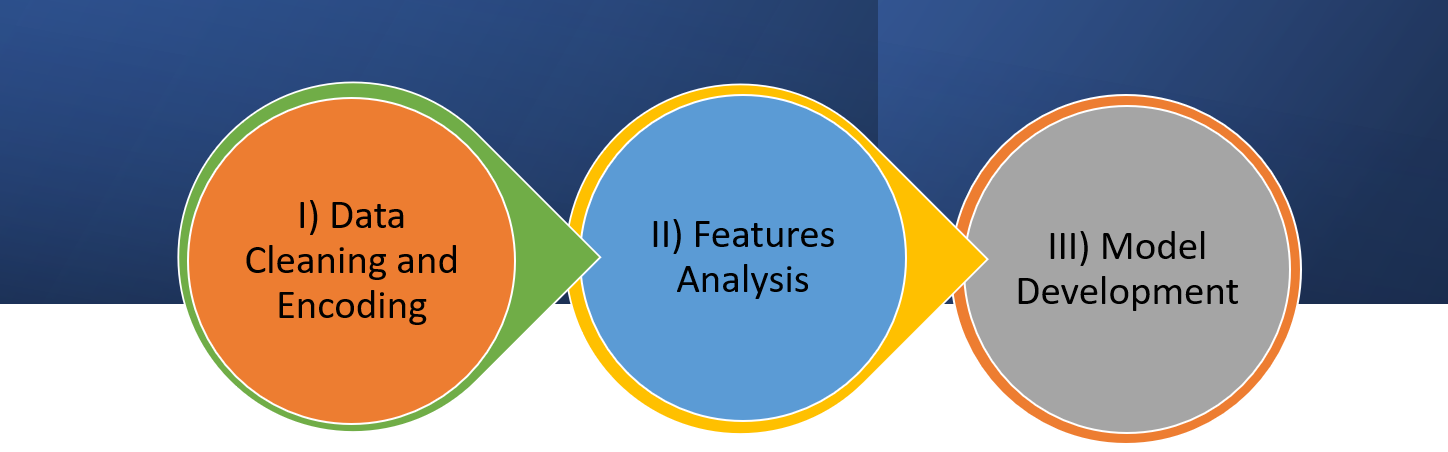

### First, we import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

# I) Data cleaning and Encoding

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df2 = df.copy()

### In this dataframe, NaN values are not empty values, they mean that the house has not the corresponding characteristic.
### The int and float columns are interesting for our model, we will see what we can do for the object columns.

In [5]:
for col in df2.columns :
    
    if df2[col].dtype == 'object':
        print(f'{col :-<20} {list(df2[col].unique())}') 
    else : 
        print(f'{col :-<20} {df2[col].dtype}')

Id------------------ int64
MSSubClass---------- int64
MSZoning------------ ['RL', 'RM', 'C (all)', 'FV', 'RH']
LotFrontage--------- float64
LotArea------------- int64
Street-------------- ['Pave', 'Grvl']
Alley--------------- [nan, 'Grvl', 'Pave']
LotShape------------ ['Reg', 'IR1', 'IR2', 'IR3']
LandContour--------- ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities----------- ['AllPub', 'NoSeWa']
LotConfig----------- ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope----------- ['Gtl', 'Mod', 'Sev']
Neighborhood-------- ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1---------- ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2---------- ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType------------ ['1Fa

In [6]:
col_mode = df2.mode(axis=0).dropna()

for col in col_mode :
    print(f'{col :-<20} {df.iat[0,col_mode.columns.get_loc(col)]}')
    

Id------------------ 1
MSSubClass---------- 60
MSZoning------------ RL
LotFrontage--------- 65.0
LotArea------------- 8450
Street-------------- Pave
Alley--------------- nan
LotShape------------ Reg
LandContour--------- Lvl
Utilities----------- AllPub
LotConfig----------- Inside
LandSlope----------- Gtl
Neighborhood-------- CollgCr
Condition1---------- Norm
Condition2---------- Norm
BldgType------------ 1Fam
HouseStyle---------- 2Story
OverallQual--------- 7
OverallCond--------- 5
YearBuilt----------- 2003
YearRemodAdd-------- 2003
RoofStyle----------- Gable
RoofMatl------------ CompShg
Exterior1st--------- VinylSd
Exterior2nd--------- VinylSd
MasVnrType---------- BrkFace
MasVnrArea---------- 196.0
ExterQual----------- Gd
ExterCond----------- TA
Foundation---------- PConc
BsmtQual------------ Gd
BsmtCond------------ TA
BsmtExposure-------- No
BsmtFinType1-------- GLQ
BsmtFinSF1---------- 706
BsmtFinType2-------- Unf
BsmtFinSF2---------- 0
BsmtUnfSF----------- 150
TotalBsmtSF--------- 8

### We replace NaN values by 0 and encode all the columns composed of {'Ex':9,'Gd':7,'TA':5,'Fa':3,'Po':1} because this encoding chart is provided by the dataset creator. In addition we drop the id column. 

### After encoding we make sure that all the encoded columns have a numeric format, if not we convert them. 

### We get rid of the object columns that have a singular composition

In [7]:
# Drop Id Column

df2.drop(['Id'], axis=1, inplace=True)

# Replace nan values by 0

df2 = df2.fillna(0)

# Encoding recurrent values

qual_dict = {'Ex':9,'Gd':7,'TA':5,'Fa':3,'Po':1}



for col in df2.columns :
    
    loc = df2.columns.get_loc(col)
    
    for i in range(len(df)):
        
        if df2.iat[i,loc] in qual_dict.keys() :
            df2.iat[i,loc] = qual_dict[df2.iat[i,loc]]
        else:
            pass
        
        
# Convert all the columns that contain number to numeric        
        
for col in df2.columns :
    
    if df2[col].dtypes == 'O':
    
        try:
            df2[col] = df2[col].astype('int8')

        except:
            pass
        
    else:
        pass


# Drop object columns      

for col in df2.columns :
    
    if df2[col].dtypes == 'O':
        df2.drop([col], axis=1, inplace=True)
        

**There are only numeric columns :** 

In [8]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,7,5,...,61,0,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,5,5,...,0,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,7,5,...,42,0,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,5,5,...,35,272,0,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,7,5,...,84,0,0,0,0,0,0,12,2008,250000


**Quick verification :**

In [9]:
for col in df2.columns :
    
    if df2[col].dtype == 'object':
        print(f'{col :-<20} {list(df2[col].unique())}') 
    else : 
        print(f'{col :-<20} {df2[col].dtype}')

MSSubClass---------- int64
LotFrontage--------- float64
LotArea------------- int64
OverallQual--------- int64
OverallCond--------- int64
YearBuilt----------- int64
YearRemodAdd-------- int64
MasVnrArea---------- float64
ExterQual----------- int8
ExterCond----------- int8
BsmtQual------------ int8
BsmtCond------------ int8
BsmtFinSF1---------- int64
BsmtFinSF2---------- int64
BsmtUnfSF----------- int64
TotalBsmtSF--------- int64
HeatingQC----------- int8
1stFlrSF------------ int64
2ndFlrSF------------ int64
LowQualFinSF-------- int64
GrLivArea----------- int64
BsmtFullBath-------- int64
BsmtHalfBath-------- int64
FullBath------------ int64
HalfBath------------ int64
BedroomAbvGr-------- int64
KitchenAbvGr-------- int64
KitchenQual--------- int8
TotRmsAbvGrd-------- int64
Fireplaces---------- int64
FireplaceQu--------- int8
GarageYrBlt--------- float64
GarageCars---------- int64
GarageArea---------- int64
GarageQual---------- int8
GarageCond---------- int8
WoodDeckSF---------- int64
Open

### Now we want to normalize our data, by doing the Min Max Scaler method which will put all our variables between 0 and 1 while keeping the same distance between them as before

In [10]:
dfn = df2.copy()

In [11]:
dfn = (dfn-dfn.min())/(dfn.max()-dfn.min())       

In [12]:
dfn['SalePrice'] = df2['SalePrice']

In [13]:
dfn.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.666667,0.5,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,208500
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.333333,0.5,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,181500
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.666667,0.5,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,223500
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.333333,0.5,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,140000
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.666667,0.5,...,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,250000


# II) Features Analysis

In [14]:
df3 = dfn.copy()

**Statistics :**

In [15]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,0.217043,0.248827,0.0,0.000000,0.176471,0.294118,1.0
LotFrontage,1460.0,0.184100,0.110749,0.0,0.134185,0.201278,0.252396,1.0
LotArea,1460.0,0.043080,0.046653,0.0,0.029229,0.038227,0.048150,1.0
OverallQual,1460.0,0.566591,0.153666,0.0,0.444444,0.555556,0.666667,1.0
OverallCond,1460.0,0.571918,0.139100,0.0,0.500000,0.500000,0.625000,1.0
YearBuilt,1460.0,0.719332,0.218862,0.0,0.594203,0.731884,0.927536,1.0
YearRemodAdd,1460.0,0.581096,0.344090,0.0,0.283333,0.733333,0.900000,1.0
MasVnrArea,1460.0,0.064448,0.112957,0.0,0.000000,0.000000,0.102656,1.0
ExterQual,1460.0,0.465297,0.191427,0.0,0.333333,0.333333,0.666667,1.0
ExterCond,1460.0,0.520890,0.087763,0.0,0.500000,0.500000,0.500000,1.0


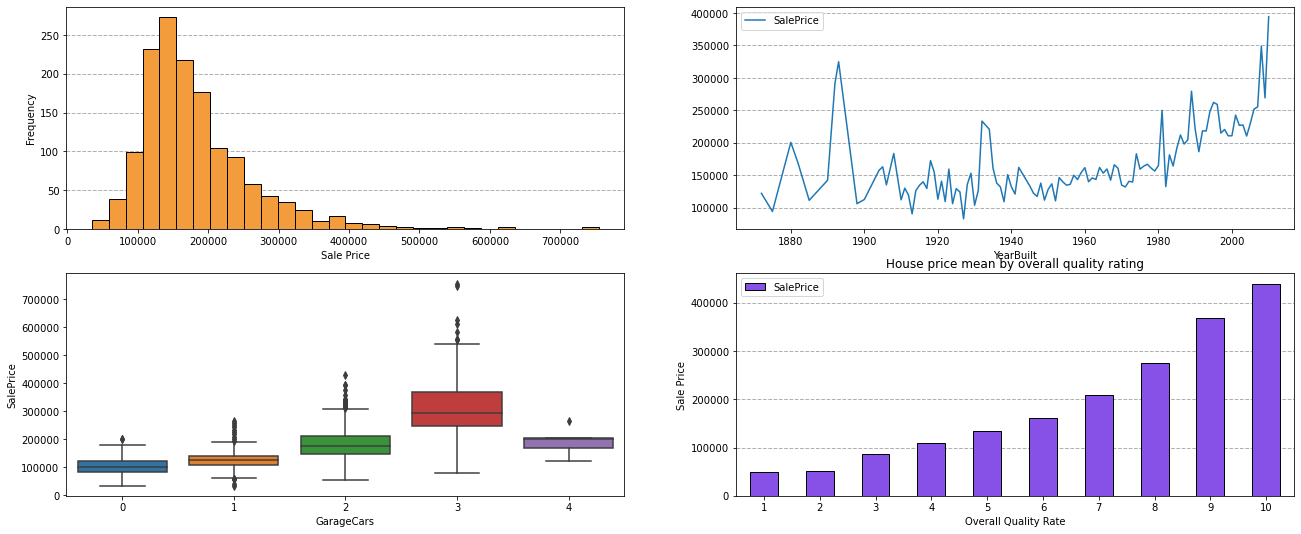

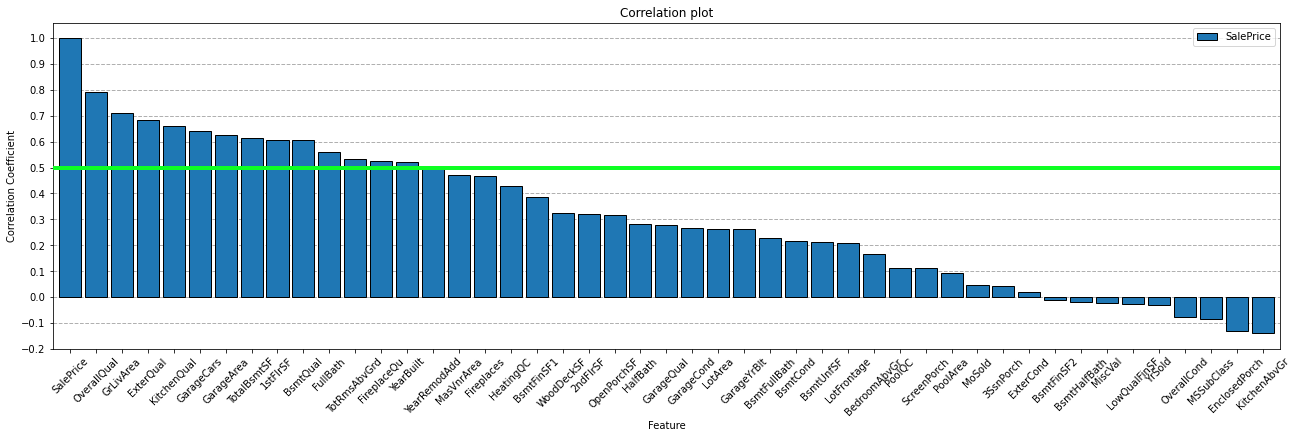

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(22, 9))


fig1 = df3['SalePrice'].plot.hist(ax=axes[0,0],bins=30,Edgecolor='black',color='#F29C3B',zorder=3)
fig1.set_xlabel('Sale Price')
fig1.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)

fig2 = df2[['YearBuilt','SalePrice']].groupby(['YearBuilt']).mean().plot.line(ax=axes[0,1])
fig2.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)

fig3 = sns.boxplot(ax=axes[1,0],x='GarageCars', y='SalePrice',data=df2)

fig4 = df2[['OverallQual','SalePrice']].groupby(['OverallQual']).mean().plot.bar(ax=axes[1,1],zorder=3,Edgecolor='black',
                                                                                 color='#8751E7')
fig4.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig4.set_xlabel('Overall Quality Rate')
fig4.set_ylabel('Sale Price')
fig4.set_title('House price mean by overall quality rating')
fig4.tick_params(axis='x', labelrotation = 0)

df3.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False).plot.bar(figsize=(22,6),zorder=2,
                                                                               Edgecolor='black', width=0.85)
plt.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')
plt.axhline(y=0.5, color= '#0EFF23', linestyle='-',zorder=3,linewidth=4)
plt.yticks(np.linspace(-0.2,1,13))
plt.title('Correlation plot')
plt.tick_params(axis='x', labelrotation = 45)



### We want to keep only the features that have at least a correlation of 0.5, no need for -0.5 

In [17]:
df4 = df3.corr()[['SalePrice']]
df4 = df4.reset_index()

In [18]:
df5 = df4.loc[df4['SalePrice'] >= 0.5]

In [19]:
df5.head()

,index,SalePrice
3,OverallQual,0.790982
5,YearBuilt,0.522897
6,YearRemodAdd,0.507101
8,ExterQual,0.682639
10,BsmtQual,0.604816


In [20]:
col_list = []

for col in df5['index']:
    col_list.append(col)

In [21]:
df6 = df3[col_list]

**Final Dataframe :**

In [22]:
df6

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageCars,GarageArea,SalePrice
0,0.666667,0.949275,0.883333,0.666667,0.777778,0.140098,0.119780,0.259231,0.666667,0.666667,0.500000,0.000000,0.50,0.386460,208500
1,0.555556,0.753623,0.433333,0.333333,0.777778,0.206547,0.212942,0.174830,0.666667,0.333333,0.333333,0.555556,0.50,0.324401,181500
2,0.666667,0.934783,0.866667,0.666667,0.777778,0.150573,0.134465,0.273549,0.666667,0.666667,0.333333,0.555556,0.50,0.428773,223500
3,0.666667,0.311594,0.333333,0.333333,0.555556,0.123732,0.143873,0.260550,0.333333,0.666667,0.416667,0.777778,0.75,0.452750,140000
4,0.777778,0.927536,0.833333,0.666667,0.777778,0.187398,0.186095,0.351168,0.666667,0.666667,0.583333,0.555556,0.75,0.589563,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.920290,0.833333,0.333333,0.777778,0.155974,0.142038,0.247362,0.666667,0.333333,0.416667,0.555556,0.50,0.324401,175000
1456,0.555556,0.768116,0.633333,0.333333,0.777778,0.252373,0.399036,0.327619,0.666667,0.333333,0.416667,0.555556,0.50,0.352609,210000
1457,0.666667,0.500000,0.933333,1.000000,0.555556,0.188543,0.195961,0.377920,0.666667,0.666667,0.583333,0.777778,0.25,0.177715,266500
1458,0.444444,0.565217,0.766667,0.333333,0.555556,0.176432,0.170721,0.140166,0.333333,0.666667,0.250000,0.000000,0.25,0.169252,142125


# III) Model Development

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import *

from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [28]:
def encoding_normalizing(df):
    
    # Drop Id Column

    df.drop(['Id'], axis=1, inplace=True)

    # Replace nan values by 0

    df = df.fillna(0)

    # Encoding recurrent values

    qual_dict = {'Ex':9,'Gd':7,'TA':5,'Fa':3,'Po':1}



    for col in df.columns :

        loc = df.columns.get_loc(col)

        for i in range(len(df)):

            if df.iat[i,loc] in qual_dict.keys() :
                df.iat[i,loc] = qual_dict[df.iat[i,loc]]
            else:
                pass


    # Convert all the columns that contain number to numeric        

    for col in df.columns :

        if df[col].dtypes == 'O':

            try:
                df[col] = df[col].astype('int8')

            except:
                pass

        else:
            pass


    # Drop object columns      

    for col in df.columns :

        if df[col].dtypes == 'O':
            df.drop([col], axis=1, inplace=True)
            
            
    # Normalize columns
    
    
    
    df = (df-df.min())/(df.max()-df.min()) 
    
    
    
    col_list.remove('SalePrice')
    df = df[col_list]
   
    
    
    return df

In [29]:
# Train set creation
y = df6['SalePrice']
df7 = df6.copy()
df7.drop(['SalePrice'],axis=1,inplace=True)
X = df7
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Test set creation 
df_test = encoding_normalizing(df=pd.read_csv('test.csv'))

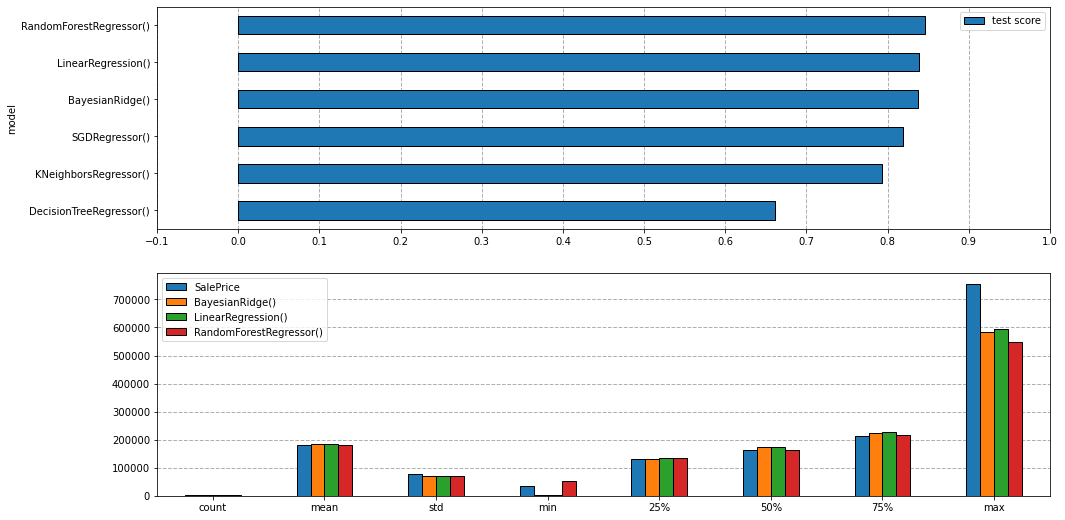

In [31]:
KNR = KNeighborsRegressor() ; ByR = linear_model.BayesianRidge() ; DTR = tree.DecisionTreeRegressor()
SGD = SGDRegressor() ; LnR = LinearRegression() ; RFR = RandomForestRegressor() 

models_list = [KNR,ByR,DTR,SGD,LnR,RFR]
scores_list = []

for model in models_list:
    
    model.fit(X_train,y_train)
    scores_list.append([str(model),model.score(X_test,y_test)])

df_models = pd.DataFrame(scores_list, columns=['model','test score']).groupby(['model']).mean().sort_values(by='test score',ascending=True)

######################

fig, axes = plt.subplots(2, 1, figsize=(16, 9))

fig1 = df_models.plot.barh(ax=axes[0],zorder=2,Edgecolor='black')
fig1.tick_params(axis='x', labelrotation = 0)
fig1.grid(axis = 'x', linestyle = '--', linewidth = 1, zorder=0)
fig1.set_xticks(np.linspace(-0.1,1,12))


prices= df6[['SalePrice']].describe()
df_models = df_models.reset_index()
for model in models_list:
     if str(model) in list(df_models['model'].tail(3)):
        prices[str(model)] = pd.Series(model.predict(df_test)).describe()

#######################""



fig2 = prices.plot.bar(ax=axes[1],Edgecolor='black',zorder=3)
fig2.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig2.tick_params(axis='x', labelrotation = 0)

### Thanks to the first plot we can see that the RandomForestRegressor predict the right SalePrice around 85% of the time. LinearRegression and BayesianRidge more than 80% of the time. We keep these three models and want now to reach more information about them 


### Thanks to the second plot, we can see that the SalePrice values found by our models are quite similar. The main information we can get is that the maximum value from the RandomForestRegressor is smaller than the ones from the other models. 

# III.b) Errors Frequency and Metrics

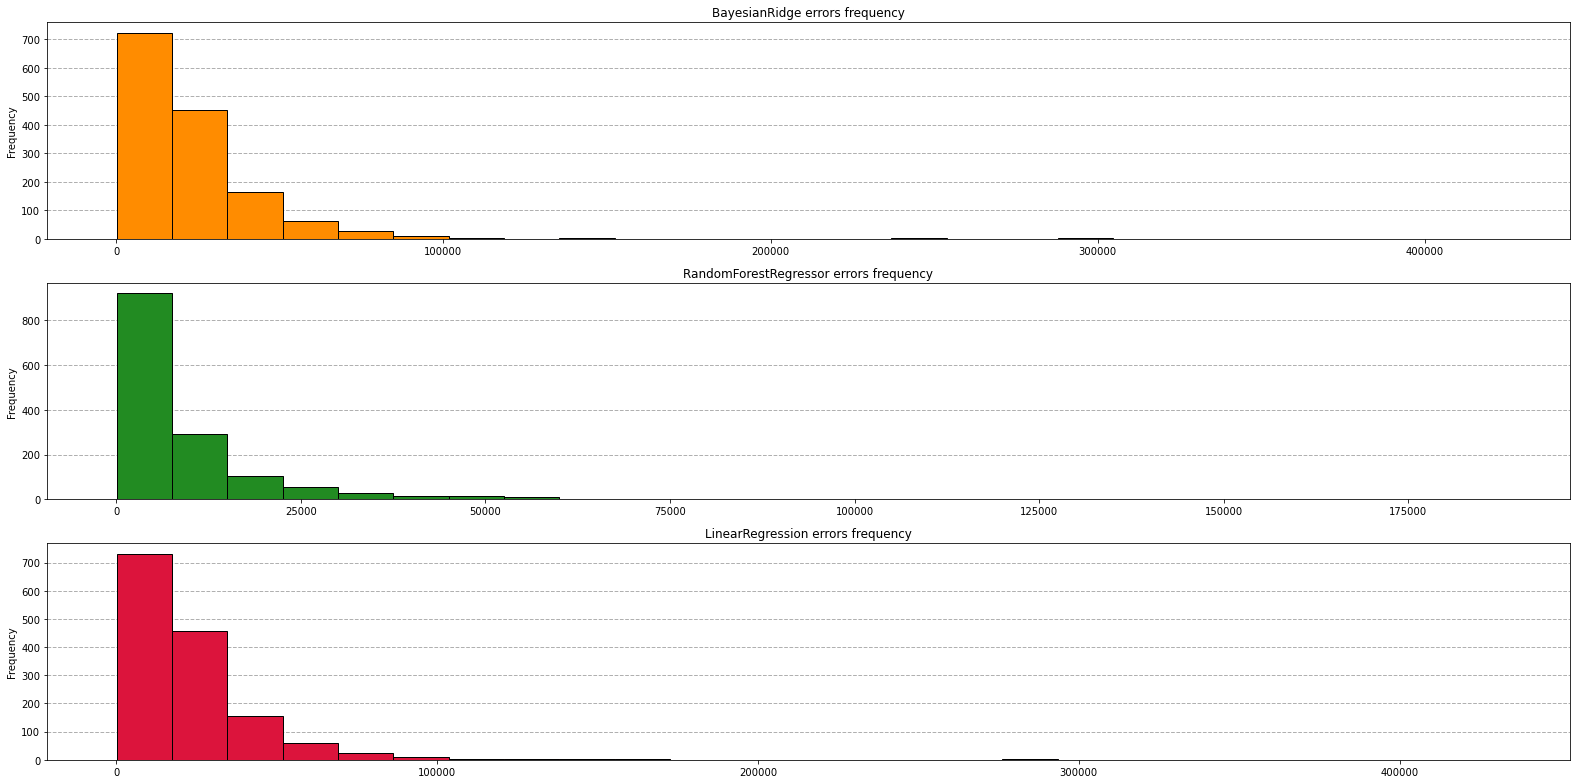

In [32]:
fig, axes = plt.subplots(3,figsize=(22,11))

byr_pred = ByR.predict(X)
rfr_pred = RFR.predict(X)
lnr_pred = LnR.predict(X)

err_byr = np.abs(y-byr_pred)
err_rfr = np.abs(y-rfr_pred)
err_lnr = np.abs(y-lnr_pred)

fig1 = err_byr.plot.hist(ax = axes[0],bins=25,Edgecolor='black',zorder=3,color='darkorange')
fig1.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig1.set_title('BayesianRidge errors frequency')

fig2 = err_rfr.plot.hist(ax = axes[1],bins=25,Edgecolor='black',zorder=3,color='forestgreen')
fig2.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig2.set_title('RandomForestRegressor errors frequency')

fig3 = err_lnr.plot.hist(ax = axes[2],bins=25,Edgecolor='black',zorder=3,color='crimson')
fig3.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig3.set_title('LinearRegression errors frequency')

fig.tight_layout()

### Most of the prediction from our three models are correct because close to zero. 
### We can also see that there are some big errors like 30 000 for BayesianRidgeRegressor and LinearRegression.
### Finally, RandomForestRegressor seems to make a very few mistakes because its biggest error is only 8000. 

In [33]:
def metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    median = median_absolute_error(true,predicted)
    return mae, mse, rmse, median

In [34]:
metrics_results = pd.DataFrame(data=[["Bayesian Ridge Regressor", *metrics(y, byr_pred)],
                                     ["Random Forest Regressor",*metrics(y,rfr_pred)],
                                     ["Linear Regression",*metrics(y,lnr_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'Median Abs Err'])
metrics_results

,Model,MAE,MSE,RMSE,Median Abs Err
0,Bayesian Ridge Regressor,23171.619441,1.319745e+09,36328.292825,17135.686754
1,Random Forest Regressor,9511.429196,2.972102e+08,17239.785057,5173.050000
2,Linear Regression,23159.617888,1.317778e+09,36301.218837,17198.610749


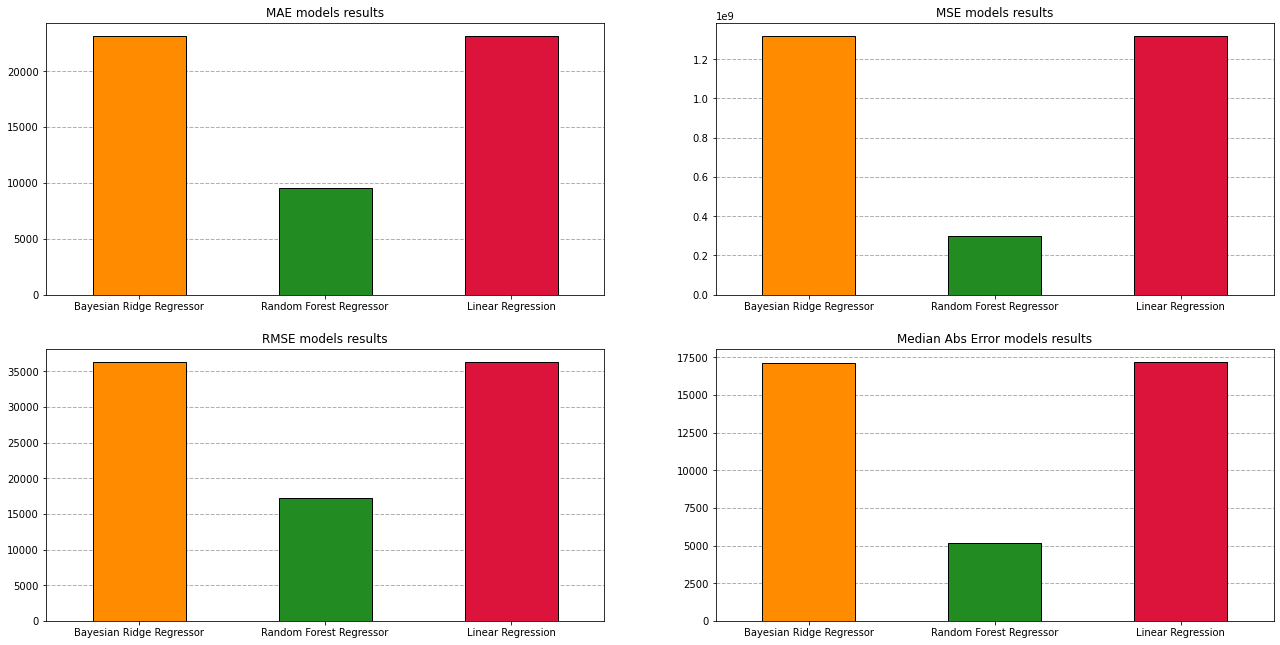

In [35]:
fig,axes=plt.subplots(2,2,figsize=(22,11))

colors = ['darkorange','forestgreen','crimson']

fig1 = metrics_results['MAE'].plot.bar(ax=axes[0,0],Edgecolor='black',color=colors,zorder=3)
fig1.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig1.set_xticklabels(['Bayesian Ridge Regressor','Random Forest Regressor','Linear Regression'])
fig1.tick_params(axis='x',labelrotation=0)
fig1.set_title('MAE models results')

fig2 = metrics_results['MSE'].plot.bar(ax=axes[0,1],Edgecolor='black',color=colors,zorder=3)
fig2.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig2.set_xticklabels(['Bayesian Ridge Regressor','Random Forest Regressor','Linear Regression'])
fig2.tick_params(axis='x',labelrotation=0)
fig2.set_title('MSE models results')

fig3 = metrics_results['RMSE'].plot.bar(ax=axes[1,0],Edgecolor='black',color=colors,zorder=3)
fig3.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig3.set_xticklabels(['Bayesian Ridge Regressor','Random Forest Regressor','Linear Regression'])
fig3.tick_params(axis='x',labelrotation=0)
fig3.set_title('RMSE models results')

fig4 = metrics_results['Median Abs Err'].plot.bar(ax=axes[1,1],Edgecolor='black',color=colors,zorder=3)
fig4.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)
fig4.set_xticklabels(['Bayesian Ridge Regressor','Random Forest Regressor','Linear Regression'])
fig4.set_title('Median Abs Error models results')
fig4.tick_params(axis='x',labelrotation=0)



### We immediately see that the Random Forest Regressor is doing less errors than the other two. 
### We saw earlier that BayesianRidgeRegressor and LinearRegression make very big errors so that explain why their mean error is so high, but when we look at the median absolute error, even their median error is higher so the RandomForestRegressor is definitely doing less errors. 
### In addition, we saw earlier that the RandomForestRegressor has the best prediction score.

# Conclusion : we choose Random Forest Regressor as main model. 